In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

c:\Users\admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [4]:
design = MS(['lstat']).fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [5]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [6]:
y = Boston['medv']

In [7]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 06 May 2025   Prob (F-statistic):           5.08e-88
Time:                        13:53:15   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [9]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [12]:
new_pred = results.get_prediction(newX)
new_pred.predicted_mean, new_pred.conf_int(alpha=0.05), new_pred.conf_int(obs=True, alpha=0.05)

(array([29.80359411, 25.05334734, 20.30310057]),
 array([[29.00741194, 30.59977628],
        [24.47413202, 25.63256267],
        [19.73158815, 20.87461299]]),
 array([[17.56567478, 42.04151344],
        [12.82762635, 37.27906833],
        [ 8.0777421 , 32.52845905]]))

In [13]:
def abline(ax, intercept, slope, *args, **kwargs):
    xlim = ax.get_xlim()
    ylim = [slope * xlim[0] + intercept, slope * xlim[1] + intercept]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\admin\AppData\Local\Temp\ipykernel_15776\1373467213.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax, results.params[0], results.params[1], 'r--', linewidth=1)


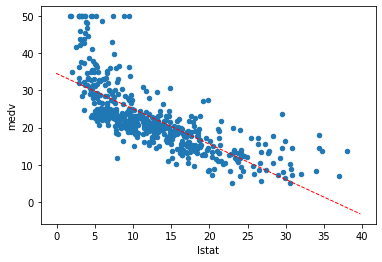

In [14]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=1)

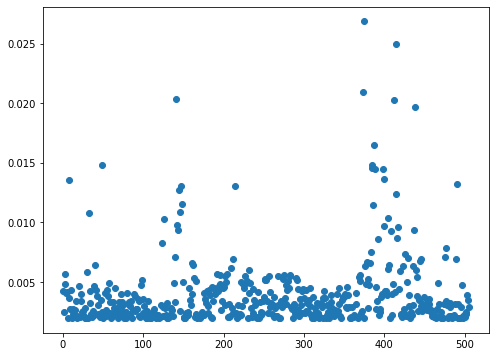

In [21]:
infl = results.get_influence()
ax = plt.subplots(1, 1, figsize=(8, 6))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)

In [22]:
infl.hat_matrix_diag

array([0.00426252, 0.00245553, 0.00486368, 0.00563978, 0.00405871,
       0.00412751, 0.00197822, 0.00361537, 0.01356717, 0.00274419,
       0.00433693, 0.00199106, 0.00233916, 0.00272569, 0.00219866,
       0.00265576, 0.00340847, 0.00213425, 0.0020123 , 0.00204949,
       0.0046947 , 0.00203007, 0.00340558, 0.00400439, 0.00249275,
       0.00255394, 0.00215694, 0.00280761, 0.00197712, 0.00199388,
       0.00581832, 0.0019821 , 0.0107798 , 0.00323656, 0.00427079,
       0.00231952, 0.00203629, 0.00256179, 0.00222348, 0.00467273,
       0.00639974, 0.00434671, 0.00379466, 0.00303157, 0.00235019,
       0.00220805, 0.0020633 , 0.00344352, 0.014778  , 0.00246481,
       0.00200095, 0.00237967, 0.00408724, 0.00266881, 0.00215527,
       0.00436495, 0.00381598, 0.0049175 , 0.00327945, 0.00243395,
       0.00198587, 0.00210028, 0.00333859, 0.00236234, 0.00279905,
       0.00445098, 0.00220239, 0.00278127, 0.0019837 , 0.00255578,
       0.0033432 , 0.00227489, 0.00395205, 0.00299147, 0.00331

In [23]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [24]:
X = MS(Boston.columns.drop('medv')).fit_transform(Boston)
model2 = sm.OLS(y, X)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 06 May 2025   Prob (F-statistic):          2.23e-133
Time:                        14:40:50   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
X = MS(Boston.columns.drop(['medv', 'indus', 'age'])).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 06 May 2025   Prob (F-statistic):          1.73e-135
Time:                        14:41:43   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     41.4517      4.903      8.454      0.000      31.818      51.086
crim          -0.1217      0.033     -3.696      0.000      -0.186      -0.057
zn             0.0462      0.014      3.378      0.001       0.019       0.073
chas           2.8719      0.863      3.329      0.001       1.177       4.567
nox          -18.2624      3.565     -5.122      0.000     -25.267     -11.258
rm             3.6730      0.409      8.978      0.000       2.869       4.477
dis           -1.5160      0.188     -8.078      0.000      -1.885      -1.147
rad            0.2839      0.064      4.440      0.000       0.158       0.410
tax           -0.0123      0.003     -3.608      0.000      -0.019      -0.006
ptratio       -0.9310      0.130     -7.138      0.000      -1.187      -0.675
lstat         -0.5465      0.047    -11.519      0.000      -0.640      -0.453
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
results.rsquared, np.sqrt(results.scale)

(0.7342422518382485, 4.7889153322237465)

In [28]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals, 'index':X.columns[1:]})
vif

,vif,index
0,1.765478,crim
1,2.239107,zn
2,1.056997,chas
3,3.758338,nox
4,1.819577,rm
5,3.438955,dis
6,6.826385,rad
7,7.258419,tax
8,1.755565,ptratio
9,2.527415,lstat


In [30]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [31]:
X = MS([poly('lstat', degree=2), 'age', ('lstat', 'age')]).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,20.5005,0.992,20.659,0.000
"poly(lstat, degree=2)[0]",-71.4385,25.246,-2.830,0.005
"poly(lstat, degree=2)[1]",86.0615,6.141,14.015,0.000
age,0.1439,0.020,7.279,0.000
lstat:age,-0.0079,0.002,-4.424,0.000


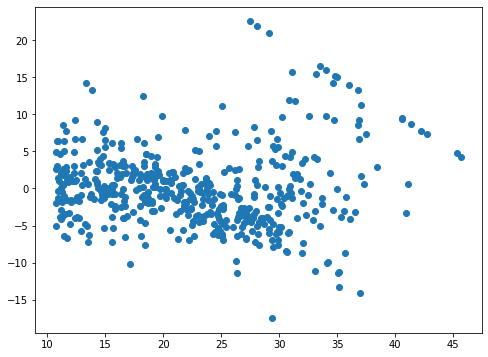

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(results.fittedvalues, results.resid)

In [34]:
results.fittedvalues, results.resid

(0      34.078425
 1      26.774718
 2      35.794079
 3      36.538210
 4      32.185414
          ...    
 501    25.147817
 502    26.728085
 503    35.189149
 504    33.089492
 505    29.361823
 Length: 506, dtype: float64,
 0     -10.078425
 1      -5.174718
 2      -1.094079
 3      -3.138210
 4       4.014586
          ...    
 501    -2.747817
 502    -6.128085
 503   -11.289149
 504   -11.089492
 505   -17.461823
 Length: 506, dtype: float64)

In [35]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [37]:
y = Carseats['Sales']
allvars = list(Carseats.columns.drop('Sales'))
final = allvars + [('Income', 'Advertising'), ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
